In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [20]:
data = pd.read_csv('iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [21]:
X = data.drop(['Id', 'Species'], axis = 1)
X = np.array(X)
X[:5] 

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

# Elbow method
The optimal number of clusters can be defined as follow: Compute clustering algorithm (e.g., k-means clustering) for different values of k. For instance, by varying k from 1 to 10 clusters. For each k, calculate the total within-cluster sum of square (wss).

In [22]:
from sklearn.cluster import KMeans 
wcss = [] 
for i in range(1, 11):
    model = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    model.fit(X)
    wcss.append(model.inertia_)


# Data Visualization¶

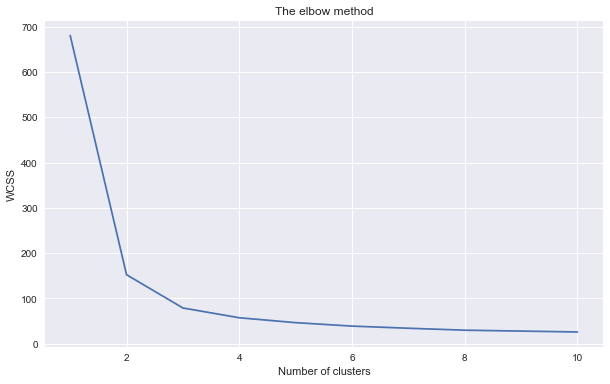

In [23]:
plt.style.use('seaborn')
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

In [24]:
model = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
pred = model.fit_predict(X)


# Cluster Visualization

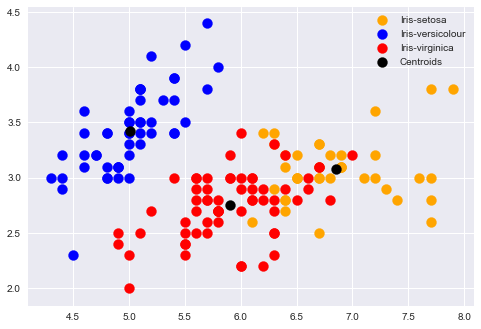

In [25]:
plt.scatter(X[pred == 0, 0],X[pred == 0, 1], s = 100, c = 'orange', label = 'Iris-setosa')
plt.scatter(X[pred == 1, 0], X[pred == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[pred == 2, 0], X[pred == 2, 1],s = 100, c = 'red', label = 'Iris-virginica')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.legend()
plt.show()
